## 6.3 Geographic Visualization

### This script contains the following:

#### 1. Import data and libraries

#### 2. Data wrangling

#### 3. Data Cleaning

#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [24]:
# Import ".json" file for the U.S. 

country_geo = r"C:\Users\kelly\OneDrive\Documents\us-states.json"

In [26]:
country_geo

'C:\\Users\\kelly\\OneDrive\\Documents\\us-states.json'

In [4]:
# Import the campsites data

df = pd.read_csv(r"C:\Users\kelly\OneDrive\Desktop\Campsite Prepared Data\up_to_date_data.csv")

In [5]:
df.head()

Unnamed: 0.1  Unnamed: 0  longitude  latitude  \
0            51        1091    -88.324    46.325   
1            56        1196    -88.402    46.531   
2           163        2119   -103.363    48.279   
3           261        2261   -101.327    47.615   
4           335        2374    -98.077    41.987   

                                     name park_type          dates_open  \
0                Deer Lake - State Forest        SF            all year   
1  King Lake - Copper County State Forest        SF            all year   
2                          Epping RV Park        CP   early may-mid oct   
3              Sportsmens Centennial Park        CP  early may-late sep   
4                         Elgin City Park        CP   early may-mid oct   

                           comments  num_sites  elevation           amenities  \
0  open all year but snow may block         12     1569.0               NH NR   
1  open all year but snow may block          6     1662.0               NH NR   
2               may be full - check         12     2203.0              WES DP   
3                              swim        121     1869.0          E FT DW SH   
4                              swim          8     1926.0  WES DP FT DW SH L$   

  state  nearest_town_distance nearest_town_bearing           city  
0    MI                   15.7                    N  Crystal Falls  
1    MI                    6.5                    E      Covington  
2    ND                    0.3                    W         Epping  
3    ND                    4.8                   SE       Garrison  
4    NE                    0.4                   NE          Elgin

In [6]:
df.shape

(150, 15)

### 2. Data wrangling

In [7]:
# Select only the necessary columns and put them in a list called columns

columns = ['state', 'num_sites', 'elevation', 'nearest_town_distance']

In [10]:
# Create a subset

state_camp = df[columns]

In [28]:
state_camp.head()

state  num_sites  elevation  nearest_town_distance
0    MI         12     1569.0                   15.7
1    MI          6     1662.0                    6.5
2    ND         12     2203.0                    0.3
3    ND        121     1869.0                    4.8
4    NE          8     1926.0                    0.4

In [30]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}


In [31]:
states = state_camp['state'] = state_camp['state'].replace(states)

C:\Users\kelly\AppData\Local\Temp\ipykernel_31100\3466833837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states = state_camp['state'] = state_camp['state'].replace(states)


In [32]:
state_camp.head()

state  num_sites  elevation  nearest_town_distance
0      Michigan         12     1569.0                   15.7
1      Michigan          6     1662.0                    6.5
2  North Dakota         12     2203.0                    0.3
3  North Dakota        121     1869.0                    4.8
4      Nebraska          8     1926.0                    0.4

### 3. Conduct Consistency Checks

In [14]:
# Check for missing values

state_camp.isnull().sum()

state                    0
num_sites                0
elevation                0
nearest_town_distance    0
dtype: int64

#### Duplicates Check

In [15]:
dups = state_camp.duplicated()

In [16]:
dups.shape # no dups

(150,)

#### Extreme values check

<AxesSubplot:xlabel='num_sites', ylabel='Count'>

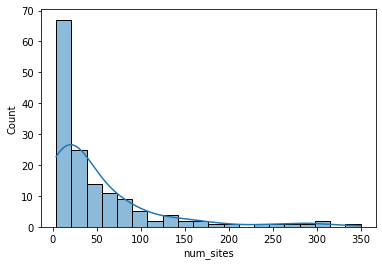

In [17]:
# Check the num_sites variable

sns.histplot(state_camp['num_sites'], bins=20, kde = True) # shows extreme values for 'num_sites'

<AxesSubplot:xlabel='elevation', ylabel='Count'>

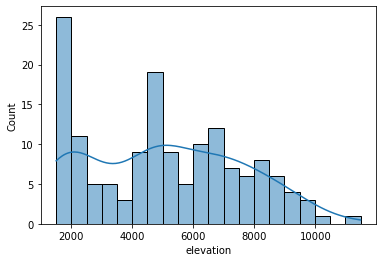

In [19]:
# Check the elevation variable

sns.histplot(state_camp['elevation'], bins=20, kde = True)  # shows extreme values for 'elevation'

<AxesSubplot:xlabel='nearest_town_distance', ylabel='Count'>

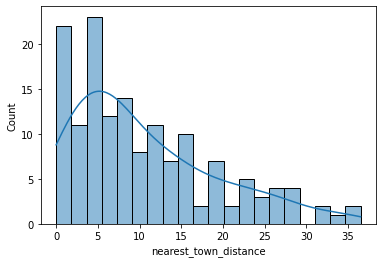

In [20]:
# Check the nearest_town_distance variable

sns.histplot(state_camp['nearest_town_distance'], bins=20, kde = True)

In [21]:
state_camp.dtypes

state                     object
num_sites                  int64
elevation                float64
nearest_town_distance    float64
dtype: object

### 4. Plotting a choropleth

In [22]:
# Create a data frame with just the states and the values for num_sites I want plotted

data_to_plot = state_camp[['state','num_sites']]
data_to_plot.head()

state  num_sites
0    MI         12
1    MI          6
2    ND         12
3    ND        121
4    NE          8

In [34]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state', 'num_sites'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Sites").add_to(map)
folium.LayerControl().add_to(map)

map


I'm not sure why the whole map is the same color.  The states do not have the same number of campsites.  You can see that from the head()function above.  This map would not help me answer any research questions.  I was hoping it could help show me how many campsites are in each state and try to get insight if warmer or colder states have more campsites.  I'm disappointed with the results.